In [1]:
## 필요 패키지 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import datetime
pd.options.display.max_rows = 20
import re
import math

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import warnings
warnings.filterwarnings(action='ignore')

## 아래는 matplotlib 한국어 표시해주는 코드

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
#os.chdir('C:\\Users\\82104\\Desktop\\새민이\\DSL')
os.chdir('C:\\Users\\82104\\Documents\\카카오톡 받은 파일')
apt = pd.read_csv('seoul_apt.csv').iloc[:,1:]

In [3]:
def timewise_plot (dataset, title) : 
    old = dataset[dataset.built_date <= 1988]
    new = dataset[dataset.built_date > 2000]
    old = old.groupby(by = ['year_month'], as_index = False).mean().PpP
    new = new.groupby(by = ['year_month'], as_index = False).mean().PpP
    plt.plot(np.arange(55), old, color = 'red', label = '재건축 코인')
    plt.plot(np.arange(55), new, color = 'blue', label = '그런거 없다')
    plt.axvline([20], color = 'black')
    plt.axvline([44], color = 'black')
    plt.xticks(np.arange(0,55, step = 12), [201601,201701,201801,201901, 202001])
    plt.legend()
    plt.title(title)
    plt.show()
    
def simple_plot(dataset, title) : 
    dataset = dataset.groupby(by = ['year_month'], as_index = False).mean().PpP
    plt.plot(np.arange(55), dataset, label = 'm2당 가격')
    plt.axvline([20], color = 'black')
    plt.axvline([33], color = 'black')
    plt.axvline([45], color = 'black')
    plt.xticks(np.arange(0,55, step = 12), [201601,201701,201801,201901, 202001])
    plt.legend()
    plt.title(title)
    plt.show()
    
def sizewise_plot(dataset, title) :
    small = dataset[dataset.house_size <= 60]
    middle_p = dataset[dataset.house_size < 100]
    middle = middle_p[middle_p.house_size > 60]
    big = dataset[dataset.house_size >= 100]
    small = small.groupby(by = ['year_month'], as_index = False).mean().PpP
    middle = middle.groupby(by = ['year_month'], as_index = False).mean().PpP
    big = big.groupby(by = ['year_month'], as_index = False).mean().PpP
    plt.plot(np.arange(55), small, color = 'red', label = '소형')
    plt.plot(np.arange(55), middle, color = 'blue', label = '중형')
    plt.plot(np.arange(55), big, color = 'green', label = '대형')
    plt.axvline([20], color = 'black')
    plt.axvline([33], color = 'black')
    plt.axvline([45], color = 'black')
    plt.xticks(np.arange(0,55, step = 12), [201601,201701,201801,201901, 202001])
    plt.legend()
    plt.title(title)
    plt.show()

## 강남

In [4]:
gangnam = apt[apt.only_gu == '강남구 ']

In [5]:
g = gangnam.groupby(by = ['year_month'], as_index = False).count().price
g

0     275
1     268
2     606
3     863
4     782
     ... 
50    135
51    145
52    303
53    780
54    116
Name: price, Length: 55, dtype: int64

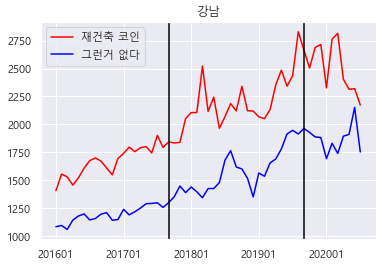

In [6]:
timewise_plot(gangnam, "강남")

In [7]:
old = gangnam[gangnam.built_date <= 1988]
when = old[old.year_month == 201810]

In [8]:
when.mean().PpP

2341.33168447257

In [9]:
when.name.unique()

array(['개포주공 1단지', '개포주공 4단지', '개포주공 6단지', '현대3', '개포우성1', '은마',
       '한보미도맨션1', '한보미도맨션2', '한신엠비씨', '미성2차', '한양1차(영동한양)',
       '현대2차(10,11,20,23,24,25동)', '우성7', '청담삼익아파트'], dtype=object)

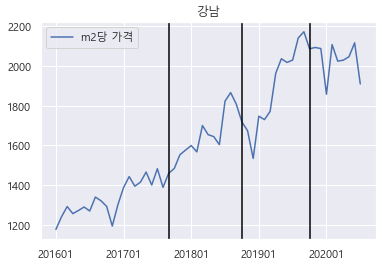

In [11]:
simple_plot(gangnam, "강남")

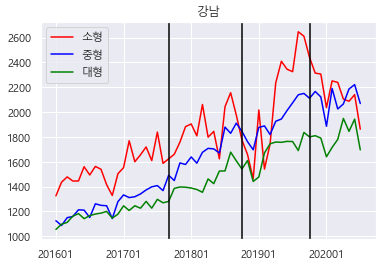

In [12]:
sizewise_plot(gangnam, "강남")

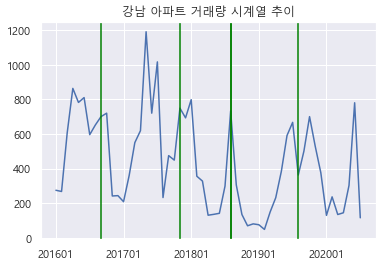

In [13]:
y = gangnam.groupby(by = ['year_month'], as_index = False).count().price
plt.plot(y)
plt.xticks(np.arange(0,55, step = 12), [201601,201701,201801,201901, 202001])
plt.title('강남 아파트 거래량 시계열 추이')
plt.axvline([8], color = 'green')
plt.axvline([22], color = 'green')
plt.axvline([31], color = 'green')
plt.axvline([31], color = 'green')
plt.axvline([43], color = 'green')

## 서초

In [14]:
sc = apt[apt.only_gu == "서초구 "]

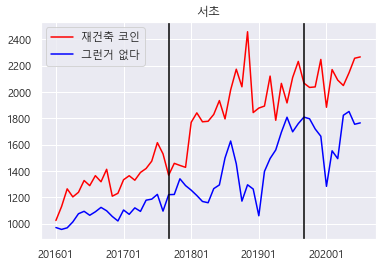

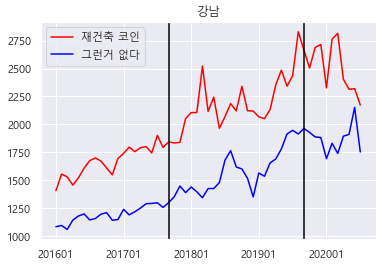

In [15]:
timewise_plot(sc, "서초")
timewise_plot(gangnam, "강남")

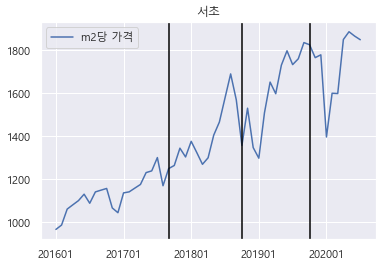

In [16]:
simple_plot(sc, "서초")

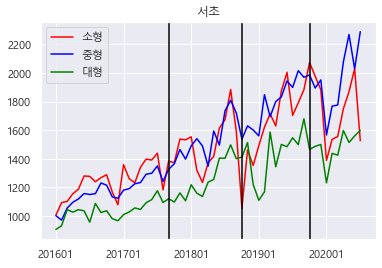

In [17]:
sizewise_plot(sc, "서초")

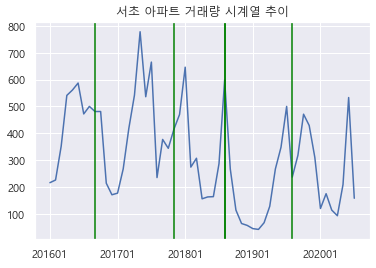

In [18]:
y = sc.groupby(by = ['year_month'], as_index = False).count().price
plt.plot(y)
plt.xticks(np.arange(0,55, step = 12), [201601,201701,201801,201901, 202001])
plt.title('서초 아파트 거래량 시계열 추이')
plt.axvline([8], color = 'green')
plt.axvline([22], color = 'green')
plt.axvline([31], color = 'green')
plt.axvline([31], color = 'green')
plt.axvline([43], color = 'green')

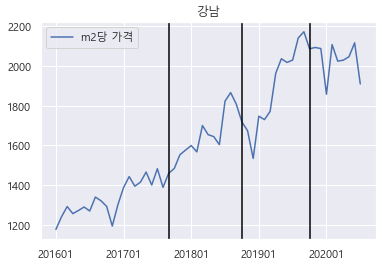

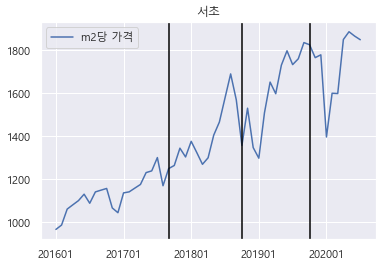

In [19]:
simple_plot(gangnam, "강남")
simple_plot(sc, "서초")

In [20]:
old = sc[sc.built_date <= 1988]  #아웃라이어여부찾기
when = old[old.year_month == 201811]

In [21]:
when.mean().PpP

2456.2826116050587

In [22]:
when.name.unique()

array(['반포 주공1단지', '반포미도', '에이아이디차관주택', '한신상가', '방배신삼호', '신반포10', '신반포2',
       '신반포4', '신반포8'], dtype=object)

In [23]:
when

,Unnamed: 0.1,Unnamed: 0.1.1,sigungu,bunzi,bonbun,bubun,name,house_size,year_month,date,floor,built_date,road_address,price,only_gu,dong,PpP
264264,264264,264264,서울특별시 서초구 반포동,757,757,0,반포 주공1단지,140.13,201811,13,5,1973,신반포로 9,410000,서초구,반포동,2925.854564
264265,264265,264265,서울특별시 서초구 반포동,757,757,0,반포 주공1단지,107.47,201811,21,4,1973,신반포로 45,350000,서초구,반포동,3256.722806
264266,264266,264266,서울특별시 서초구 반포동,757,757,0,반포 주공1단지,106.25,201811,22,4,1973,신반포로 45,330000,서초구,반포동,3105.882353
264267,264267,264267,서울특별시 서초구 반포동,757,757,0,반포 주공1단지,140.33,201811,22,3,1973,신반포로 9,408000,서초구,반포동,2907.432481
264406,264406,264406,서울특별시 서초구 반포동,60-4,60,4,반포미도,84.96,201811,9,13,1987,서초중앙로29길 28,155000,서초구,반포동,1824.387947
264644,264644,264644,서울특별시 서초구 반포동,968,968,0,에이아이디차관주택,72.51,201811,16,3,1974,신반포로 32,201000,서초구,반포동,2772.031444
264710,264710,264710,서울특별시 서초구 반포동,885,885,0,한신상가,106.58,201811,28,5,1974,신반포로 27-6,130000,서초구,반포동,1219.741040
265048,265048,265048,서울특별시 서초구 방배동,725,725,0,방배신삼호,105.04,201811,30,12,1983,방배로 270,168000,서초구,방배동,1599.390708
266815,266815,266815,서울특별시 서초구 잠원동,58-16,58,16,신반포10,54.03,201811,10,11,1981,나루터로4길 39,159000,서초구,잠원동,2942.809550
266904,266904,266904,서울특별시 서초구 잠원동,73,73,0,신반포2,79.42,201811,28,8,1978,신반포로23길 41,170000,서초구,잠원동,2140.518761


## 강남/서초 묶어보기

In [24]:
ad = pd.DataFrame([])
for k in ('강남구 ','서초구 ' ): 
    p1 = apt[apt.only_gu == k]
    ad = pd.concat([ad,p1])

ad

,Unnamed: 0.1,Unnamed: 0.1.1,sigungu,bunzi,bonbun,bubun,name,house_size,year_month,date,floor,built_date,road_address,price,only_gu,dong,PpP
0,0,0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201603,28,5,1988,언주로 103,75000,강남구,개포동,964.630225
1,1,1,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201604,2,2,1988,언주로 103,71000,강남구,개포동,913.183280
2,2,2,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201605,6,9,1988,언주로 103,76900,강남구,개포동,989.067524
3,3,3,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201605,19,9,1988,언주로 103,75500,강남구,개포동,971.061093
4,4,4,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201612,27,5,1988,언주로 103,80000,강남구,개포동,1028.938907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403569,403569,403569,서울특별시 서초구 잠원동,53,53,0,현대,84.87,202006,22,11,1993,잠원로12길 4,176000,서초구,잠원동,2073.759868
403570,403570,403570,서울특별시 서초구 잠원동,53,53,0,현대,84.87,202007,3,12,1993,잠원로12길 4,180000,서초구,잠원동,2120.890774
403571,403571,403571,서울특별시 서초구 잠원동,51,51,0,훼미리,84.83,202005,9,11,1992,잠원로 202-11,172000,서초구,잠원동,2027.584581
403572,403572,403572,서울특별시 서초구 잠원동,51,51,0,훼미리,84.90,202006,8,14,1992,잠원로 202-11,174000,서초구,잠원동,2049.469965


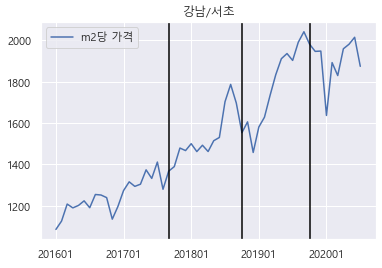

In [25]:
simple_plot(ad, "강남/서초")

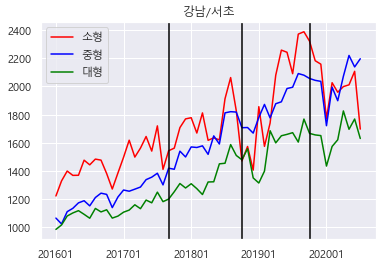

In [26]:
sizewise_plot(ad, "강남/서초")

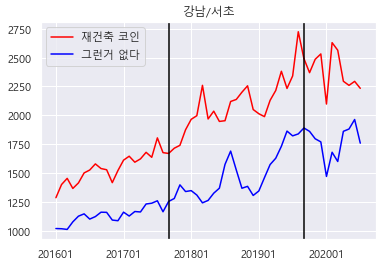

In [27]:
timewise_plot(ad, "강남/서초")

## 잠실

In [28]:
temp=[]
for i in range(len(apt.dong)):
    temp.append(apt["dong"][i] in ["잠실동", "신천동"])
jamsil = apt[temp]
jamsil

,Unnamed: 0.1,Unnamed: 0.1.1,sigungu,bunzi,bonbun,bubun,name,house_size,year_month,date,floor,built_date,road_address,price,only_gu,dong,PpP
84419,84419,84419,서울특별시 송파구 신천동,11-8,11,8,더샵스타리버,171.53,201601,20,17,2006,올림픽로35길 93,90000,송파구,신천동,524.689559
84420,84420,84420,서울특별시 송파구 신천동,11-8,11,8,더샵스타리버,142.17,201601,23,37,2006,올림픽로35길 93,92000,송파구,신천동,647.112612
84421,84421,84421,서울특별시 송파구 신천동,11-8,11,8,더샵스타리버,142.17,201604,13,32,2006,올림픽로35길 93,90000,송파구,신천동,633.044946
84422,84422,84422,서울특별시 송파구 신천동,11-8,11,8,더샵스타리버,171.53,201604,15,15,2006,올림픽로35길 93,105500,송파구,신천동,615.052760
84423,84423,84423,서울특별시 송파구 신천동,11-8,11,8,더샵스타리버,142.17,201604,18,17,2006,올림픽로35길 93,86500,송파구,신천동,608.426532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410271,410271,410271,서울특별시 송파구 잠실동,331,331,0,현대,84.68,202002,6,5,1990,백제고분로18길 7,119000,송파구,잠실동,1405.290505
410272,410272,410272,서울특별시 송파구 잠실동,331,331,0,현대,84.68,202002,16,4,1990,백제고분로18길 7,119500,송파구,잠실동,1411.195087
410273,410273,410273,서울특별시 송파구 잠실동,331,331,0,현대,84.68,202004,1,2,1990,백제고분로18길 7,117500,송파구,잠실동,1387.576760
410274,410274,410274,서울특별시 송파구 잠실동,331,331,0,현대,84.68,202006,10,11,1990,백제고분로18길 7,123000,송파구,잠실동,1452.527161


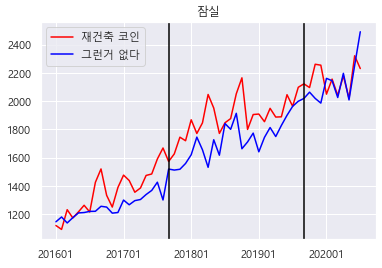

In [29]:
timewise_plot(jamsil, "잠실")

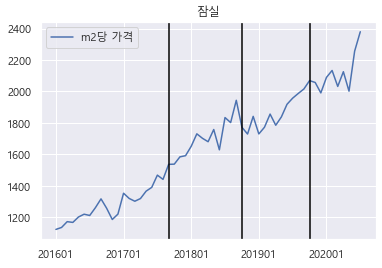

In [30]:
simple_plot(jamsil, "잠실")

## 강남3구 

In [31]:
h = pd.concat([ad,jamsil])

h

,Unnamed: 0.1,Unnamed: 0.1.1,sigungu,bunzi,bonbun,bubun,name,house_size,year_month,date,floor,built_date,road_address,price,only_gu,dong,PpP
0,0,0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201603,28,5,1988,언주로 103,75000,강남구,개포동,964.630225
1,1,1,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201604,2,2,1988,언주로 103,71000,강남구,개포동,913.183280
2,2,2,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201605,6,9,1988,언주로 103,76900,강남구,개포동,989.067524
3,3,3,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201605,19,9,1988,언주로 103,75500,강남구,개포동,971.061093
4,4,4,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201612,27,5,1988,언주로 103,80000,강남구,개포동,1028.938907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410271,410271,410271,서울특별시 송파구 잠실동,331,331,0,현대,84.68,202002,6,5,1990,백제고분로18길 7,119000,송파구,잠실동,1405.290505
410272,410272,410272,서울특별시 송파구 잠실동,331,331,0,현대,84.68,202002,16,4,1990,백제고분로18길 7,119500,송파구,잠실동,1411.195087
410273,410273,410273,서울특별시 송파구 잠실동,331,331,0,현대,84.68,202004,1,2,1990,백제고분로18길 7,117500,송파구,잠실동,1387.576760
410274,410274,410274,서울특별시 송파구 잠실동,331,331,0,현대,84.68,202006,10,11,1990,백제고분로18길 7,123000,송파구,잠실동,1452.527161


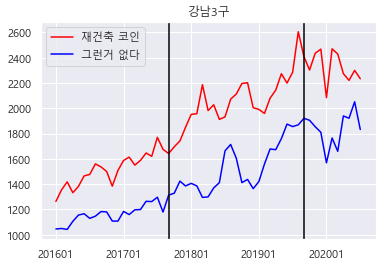

In [32]:
timewise_plot(h, "강남3구")

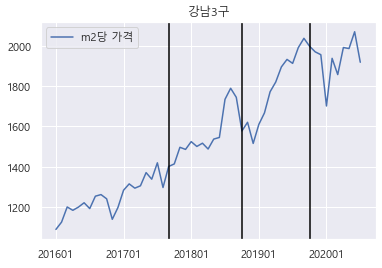

In [33]:
simple_plot(h, '강남3구')

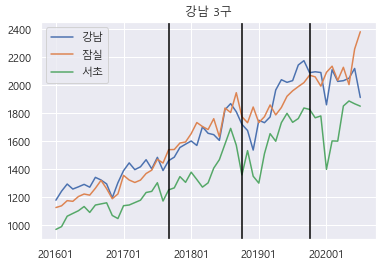

In [44]:
g = gangnam.groupby(by = ['year_month']).mean().PpP
j = jamsil.groupby(by = ['year_month']).mean().PpP
s = sc.groupby(by = ['year_month']).mean().PpP

plt.plot(np.arange(55), g,  label = '강남')
plt.plot(np.arange(55), j, label = '잠실')
plt.plot(np.arange(55), s, label = '서초')
plt.axvline([20], color = 'black')
plt.axvline([33], color = 'black')
plt.axvline([45], color = 'black')
plt.xticks(np.arange(0,55, step = 12), [201601,201701,201801,201901, 202001])
plt.legend()
plt.title("강남 3구")
plt.show()

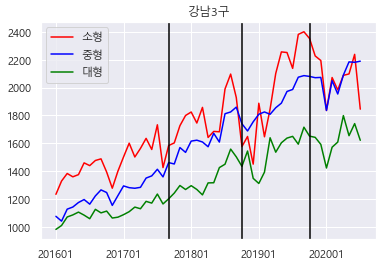

In [35]:
sizewise_plot(h, "강남3구")

In [36]:
jamsil[jamsil.year_month >= 202006]

,Unnamed: 0.1,Unnamed: 0.1.1,sigungu,bunzi,bonbun,bubun,name,house_size,year_month,date,floor,built_date,road_address,price,only_gu,dong,PpP
409268,409268,409268,서울특별시 송파구 신천동,11-8,11,8,더샵스타리버,171.53,202006,22,13,2006,올림픽로35길 93,154750,송파구,신천동,902.174547
409275,409275,409275,서울특별시 송파구 신천동,7-14,7,14,더샵스타파크,173.17,202006,16,8,2008,올림픽로35가길 10,157000,송파구,신천동,906.623549
409282,409282,409282,서울특별시 송파구 신천동,7-18,7,18,롯데캐슬골드,166.70,202006,5,21,2005,올림픽로 269,189500,송파구,신천동,1136.772645
409283,409283,409283,서울특별시 송파구 신천동,7-18,7,18,롯데캐슬골드,166.70,202006,11,19,2005,올림픽로 269,175000,송파구,신천동,1049.790042
409284,409284,409284,서울특별시 송파구 신천동,7-18,7,18,롯데캐슬골드,203.26,202006,13,33,2005,올림픽로 269,230000,송파구,신천동,1131.555643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410266,410266,410266,서울특별시 송파구 잠실동,35,35,0,트리지움,84.95,202006,22,19,2007,잠실로 62,210000,송파구,잠실동,2472.042378
410269,410269,410269,서울특별시 송파구 잠실동,336-5,336,5,포스코더샵,84.26,202006,9,6,2004,백제고분로 188,97800,송파구,잠실동,1160.693093
410270,410270,410270,서울특별시 송파구 잠실동,239-6,239,6,한영해시안아파트,63.65,202006,22,5,2017,백제고분로19길 23,81000,송파구,잠실동,1272.584446
410274,410274,410274,서울특별시 송파구 잠실동,331,331,0,현대,84.68,202006,10,11,1990,백제고분로18길 7,123000,송파구,잠실동,1452.527161


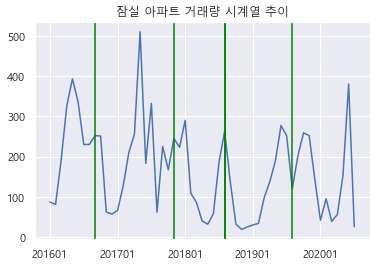

In [37]:
y = jamsil.groupby(by = ['year_month'], as_index = False).count().price
plt.plot(y)
plt.xticks(np.arange(0,55, step = 12), [201601,201701,201801,201901, 202001])
plt.title('잠실 아파트 거래량 시계열 추이')
plt.axvline([8], color = 'green')
plt.axvline([22], color = 'green')
plt.axvline([31], color = 'green')
plt.axvline([31], color = 'green')
plt.axvline([43], color = 'green')

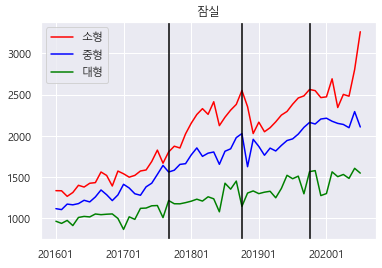

In [38]:
sizewise_plot(jamsil, "잠실")

In [39]:
small = h[h.house_size <= 60]

In [40]:
old = jamsil[jamsil.built_date <= 1988]
when = old[old.year_month == 201810]

In [41]:
when.mean().PpP

2164.812995241136

In [42]:
when

,Unnamed: 0.1,Unnamed: 0.1.1,sigungu,bunzi,bonbun,bubun,name,house_size,year_month,date,floor,built_date,road_address,price,only_gu,dong,PpP
277329,277329,277329,서울특별시 송파구 신천동,17-6,17,6,미성,46.540,201810,26,2,1980,올림픽로33길 17,132000,송파구,신천동,2836.269875
277416,277416,277416,서울특별시 송파구 신천동,7,7,0,장미1,155.220,201810,6,14,1979,올림픽로35길 104,207000,송파구,신천동,1333.591032
277483,277483,277483,서울특별시 송파구 신천동,20-4,20,4,진주,81.880,201810,6,5,1980,올림픽로 399,175000,송파구,신천동,2137.274060
277484,277484,277484,서울특별시 송파구 신천동,20-4,20,4,진주,81.880,201810,12,6,1980,올림픽로 399,175000,송파구,신천동,2137.274060
278325,278325,278325,서울특별시 송파구 잠실동,86,86,0,아시아선수촌아파트,122.785,201810,23,1,1986,올림픽로4길 15,250000,송파구,잠실동,2036.079326
278661,278661,278661,서울특별시 송파구 잠실동,27,27,0,주공아파트 5단지,76.500,201810,16,4,1978,송파대로 567,179000,송파구,잠실동,2339.869281
278662,278662,278662,서울특별시 송파구 잠실동,27,27,0,주공아파트 5단지,76.500,201810,29,7,1978,송파대로 567,178500,송파구,잠실동,2333.333333


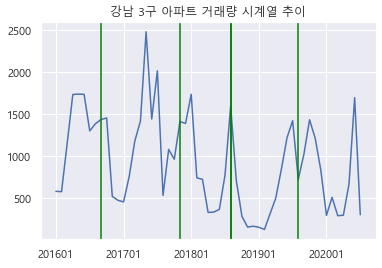

In [45]:
y = h.groupby(by = ['year_month'], as_index = False).count().price
plt.plot(y)
plt.xticks(np.arange(0,55, step = 12), [201601,201701,201801,201901, 202001])
plt.title('강남 3구 아파트 거래량 시계열 추이')
plt.axvline([8], color = 'green')
plt.axvline([22], color = 'green')
plt.axvline([31], color = 'green')
plt.axvline([31], color = 'green')
plt.axvline([43], color = 'green')

## 아웃라이어 찾아보기

In [46]:
h[h.year_month == 201901]

,Unnamed: 0.1,Unnamed: 0.1.1,sigungu,bunzi,bonbun,bubun,name,house_size,year_month,date,floor,built_date,road_address,price,only_gu,dong,PpP
296640,296640,296640,서울특별시 강남구 개포동,652,652,0,개포우성3차,133.46,201901,12,12,1984,개포로 307,197000,강남구,개포동,1476.097707
296855,296855,296855,서울특별시 강남구 개포동,189,189,0,개포주공 4단지,42.55,201901,15,3,1982,삼성로 14,140500,강남구,개포동,3301.997650
296856,296856,296856,서울특별시 강남구 개포동,189,189,0,개포주공 4단지,42.55,201901,21,4,1982,삼성로 14,139000,강남구,개포동,3266.745006
296857,296857,296857,서울특별시 강남구 개포동,189,189,0,개포주공 4단지,41.99,201901,26,1,1982,삼성로 14,137000,강남구,개포동,3262.681591
296859,296859,296859,서울특별시 강남구 개포동,187,187,0,개포주공 5단지,83.17,201901,22,9,1983,삼성로4길 17,176000,강남구,개포동,2116.147649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355313,355313,355313,서울특별시 송파구 잠실동,27,27,0,주공아파트 5단지,76.50,201901,18,12,1978,송파대로 567,175000,송파구,잠실동,2287.581699
355314,355314,355314,서울특별시 송파구 잠실동,27,27,0,주공아파트 5단지,82.51,201901,18,8,1978,송파대로 567,186500,송파구,잠실동,2260.332081
355516,355516,355516,서울특별시 송파구 잠실동,35,35,0,트리지움,84.83,201901,3,10,2007,잠실로 62,151000,송파구,잠실동,1780.030650
355517,355517,355517,서울특별시 송파구 잠실동,35,35,0,트리지움,59.88,201901,19,16,2007,잠실로 62,130000,송파구,잠실동,2171.008684


In [47]:
h[h.year_month == 201812]

,Unnamed: 0.1,Unnamed: 0.1.1,sigungu,bunzi,bonbun,bubun,name,house_size,year_month,date,floor,built_date,road_address,price,only_gu,dong,PpP
215381,215381,215381,서울특별시 강남구 개포동,189,189,0,개포주공 4단지,42.55,201812,5,2,1982,삼성로 14,165000,강남구,개포동,3877.790834
215382,215382,215382,서울특별시 강남구 개포동,189,189,0,개포주공 4단지,35.64,201812,7,4,1982,삼성로 14,141000,강남구,개포동,3956.228956
215431,215431,215431,서울특별시 강남구 개포동,185,185,0,개포주공 6단지,73.02,201812,30,9,1983,개포로 516,163000,강남구,개포동,2232.265133
215458,215458,215458,서울특별시 강남구 개포동,185,185,0,개포주공 7단지,73.26,201812,7,2,1983,개포로 516,160000,강남구,개포동,2184.002184
215459,215459,215459,서울특별시 강남구 개포동,185,185,0,개포주공 7단지,73.26,201812,31,11,1983,개포로 516,132000,강남구,개포동,1801.801802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278669,278669,278669,서울특별시 송파구 잠실동,27,27,0,주공아파트 5단지,76.50,201812,28,15,1978,송파대로 567,164500,송파구,잠실동,2150.326797
278670,278670,278670,서울특별시 송파구 잠실동,27,27,0,주공아파트 5단지,76.50,201812,29,14,1978,송파대로 567,171000,송파구,잠실동,2235.294118
278761,278761,278761,서울특별시 송파구 잠실동,35,35,0,트리지움,84.83,201812,4,11,2007,잠실로 62,152000,송파구,잠실동,1791.818932
278762,278762,278762,서울특별시 송파구 잠실동,35,35,0,트리지움,59.88,201812,10,8,2007,잠실로 62,125000,송파구,잠실동,2087.508350


In [48]:
h[h.year_month == 201811]

,Unnamed: 0.1,Unnamed: 0.1.1,sigungu,bunzi,bonbun,bubun,name,house_size,year_month,date,floor,built_date,road_address,price,only_gu,dong,PpP
215368,215368,215368,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,58.08,201811,21,3,1982,개포로 310,215000,강남구,개포동,3701.790634
215429,215429,215429,서울특별시 강남구 개포동,185,185,0,개포주공 6단지,73.02,201811,8,7,1983,개포로 516,164500,강남구,개포동,2252.807450
215430,215430,215430,서울특별시 강남구 개포동,185,185,0,개포주공 6단지,73.02,201811,27,3,1983,개포로 516,160000,강남구,개포동,2191.180498
215457,215457,215457,서울특별시 강남구 개포동,185,185,0,개포주공 7단지,73.26,201811,15,11,1983,개포로 516,162000,강남구,개포동,2211.302211
215466,215466,215466,서울특별시 강남구 개포동,649,649,0,경남1,166.48,201811,24,9,1984,언주로 110,242000,강남구,개포동,1453.628063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278560,278560,278560,서울특별시 송파구 잠실동,175-4,175,4,잠실월드메르디앙,82.01,201811,15,11,2005,올림픽로 74,98000,송파구,잠실동,1194.976222
278663,278663,278663,서울특별시 송파구 잠실동,27,27,0,주공아파트 5단지,76.50,201811,20,6,1978,송파대로 567,173750,송파구,잠실동,2271.241830
278758,278758,278758,서울특별시 송파구 잠실동,35,35,0,트리지움,59.88,201811,9,25,2007,잠실로 62,134000,송파구,잠실동,2237.808951
278759,278759,278759,서울특별시 송파구 잠실동,35,35,0,트리지움,84.95,201811,14,23,2007,잠실로 62,158000,송파구,잠실동,1859.917599


In [57]:
xz = h[h.year_month == 201812][["name","PpP"]]
xz

,name,PpP
215381,개포주공 4단지,3877.790834
215382,개포주공 4단지,3956.228956
215431,개포주공 6단지,2232.265133
215458,개포주공 7단지,2184.002184
215459,개포주공 7단지,1801.801802
...,...,...
278669,주공아파트 5단지,2150.326797
278670,주공아파트 5단지,2235.294118
278761,트리지움,1791.818932
278762,트리지움,2087.508350


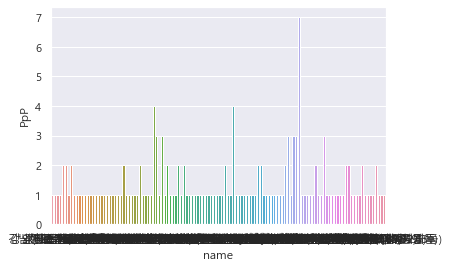

In [58]:
xz = xz.groupby("name").count().PpP
sns.barplot(
    data = xz.reset_index(),
    x = 'name',
    y = 'PpP')

In [68]:
xz = h[h.year_month == 201901][["name","PpP"]]
xz

,name,PpP
296640,개포우성3차,1476.097707
296855,개포주공 4단지,3301.997650
296856,개포주공 4단지,3266.745006
296857,개포주공 4단지,3262.681591
296859,개포주공 5단지,2116.147649
...,...,...
355313,주공아파트 5단지,2287.581699
355314,주공아파트 5단지,2260.332081
355516,트리지움,1780.030650
355517,트리지움,2171.008684


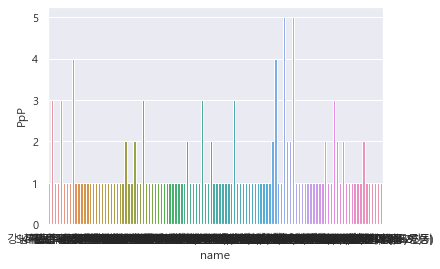

In [60]:
xz = xz.groupby("name").count().PpP
sns.barplot(
    data = xz.reset_index(),
    x = 'name',
    y = 'PpP')

In [69]:
xz = xz.groupby("name").count().PpP
xz

name
SK허브프리모        1
e-편한세상         3
강남 더샵 포레스트     1
개포우성3차         1
개포주공 4단지       3
              ..
현대슈퍼빌          1
현대탑빌라          1
현대트라움          1
현대힐스테이트 2단지    1
홍실아파트          1
Name: PpP, Length: 114, dtype: int64

In [70]:
xz.max()

5

In [73]:
xz = h[h.year_month == 202001][["name","PpP"]]
xz

,name,PpP
371556,개포우성3차,1648.433988
371560,개포자이(12-2),1511.541325
371592,개포주공 6단지,2993.514053
371608,개포주공 7단지,2814.351547
371621,디에이치아너힐즈,3022.589882
...,...,...
410000,잠실엘스,2358.490566
410126,주공아파트 5단지,2464.836601
410127,주공아파트 5단지,2542.483660
410128,주공아파트 5단지,2444.444444


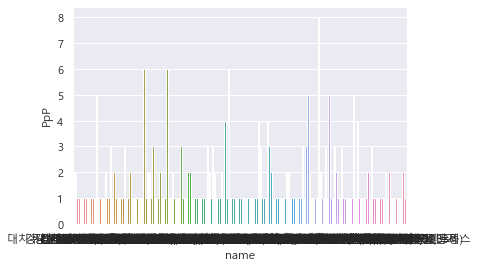

In [74]:
xz = xz.groupby("name").count().PpP
sns.barplot(
    data = xz.reset_index(),
    x = 'name',
    y = 'PpP')

In [75]:
xz = h[h.year_month == 201912][["name","PpP"]]
xz

,name,PpP
296657,개포자이(12-2),1279.943636
296658,개포자이(12-2),1199.382496
296842,개포주공 1단지,4859.456884
296843,개포주공 1단지,4366.812227
296844,개포주공 1단지,4292.929293
...,...,...
355717,한영해시안아파트,1241.162608
355736,현대,1428.908833
355737,현대,1320.264525
355738,현대,1299.008030


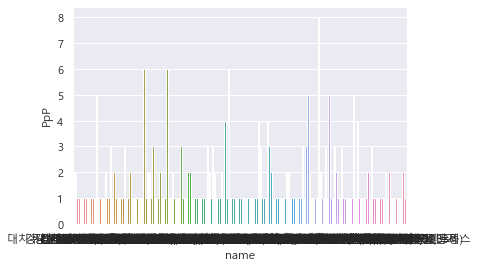

In [77]:
xz = xz.groupby("name").count().PpP
sns.barplot(
    data = xz.reset_index(),
    x = 'name',
    y = 'PpP')

In [80]:
asmall = h[h.house_size <= 60]
asmall

,Unnamed: 0.1,Unnamed: 0.1.1,sigungu,bunzi,bonbun,bubun,name,house_size,year_month,date,floor,built_date,road_address,price,only_gu,dong,PpP
53,53,53,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,49.56,201601,4,2,1982,선릉로 7,88000,강남구,개포동,1775.625504
54,54,54,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,35.64,201601,9,4,1982,개포로 310,64000,강남구,개포동,1795.735129
55,55,55,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,49.56,201601,11,3,1982,선릉로 7,90000,강남구,개포동,1815.980630
56,56,56,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201601,14,3,1982,개포로 310,89000,강남구,개포동,1757.503949
57,57,57,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201601,20,2,1982,개포로 310,87300,강남구,개포동,1723.933649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410241,410241,410241,서울특별시 송파구 잠실동,35,35,0,트리지움,59.88,202006,10,13,2007,잠실로 62,165000,송파구,잠실동,2755.511022
410252,410252,410252,서울특별시 송파구 잠실동,35,35,0,트리지움,59.88,202006,18,19,2007,잠실로 62,170000,송파구,잠실동,2839.011356
410254,410254,410254,서울특별시 송파구 잠실동,35,35,0,트리지움,59.88,202006,19,11,2007,잠실로 62,170000,송파구,잠실동,2839.011356
410263,410263,410263,서울특별시 송파구 잠실동,35,35,0,트리지움,59.88,202006,22,5,2007,잠실로 62,172000,송파구,잠실동,2872.411490


In [81]:
xz = asmall[asmall.year_month == 201912][["name","PpP"]]
xz

,name,PpP
296842,개포주공 1단지,4859.456884
296843,개포주공 1단지,4366.812227
296844,개포주공 1단지,4292.929293
296845,개포주공 1단지,4883.277751
296846,개포주공 1단지,4403.633491
...,...,...
355292,잠실엘스,2810.206805
355293,잠실엘스,2835.223482
355294,잠실엘스,2918.612408
355295,잠실엘스,2885.256838
